In [1]:
from pandas import read_csv
from funciones import tipo_transferencia, barplot

transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
#                   ANALISIS    DE      TARJETAS

In [3]:
#   Octavo analisis
analisis = transactions[["target", "feat_card_4", "ammount"]]

In [4]:
analisis = analisis.rename(columns={"target":"Transaccion", "feat_card_4":"Tarjeta", "ammount":"Monto"})

In [5]:
analisis = analisis.fillna("Otra")

In [6]:
analisis["Transaccion"] = analisis["Transaccion"].map(tipo_transferencia)

In [7]:
#                   ANALISIS    POR     CANTIDAD

In [8]:
analisis_cantidad = analisis.pivot_table(values="Transaccion", index="Tarjeta", columns="Transaccion", aggfunc="count")

In [9]:
analisis_cantidad["Promedio fraude en %"] = round(analisis_cantidad.Fraude * 100 / (analisis_cantidad.Fraude + analisis_cantidad.Legal), 2)

In [10]:
analisis_cantidad["Promedio legal en %"] = round(analisis_cantidad.Legal * 100 / (analisis_cantidad.Fraude + analisis_cantidad.Legal), 2)

In [11]:
analisis_cantidad = analisis_cantidad.reset_index()

In [12]:
analisis_cantidad

Transaccion,Tarjeta,Fraude,Legal,Promedio fraude en %,Promedio legal en %
0,Otra,26,807,3.12,96.88
1,american express,218,7274,2.91,97.09
2,discover,435,5291,7.60,92.40
3,mastercard,5574,154509,3.48,96.52
4,visa,11327,316498,3.46,96.54


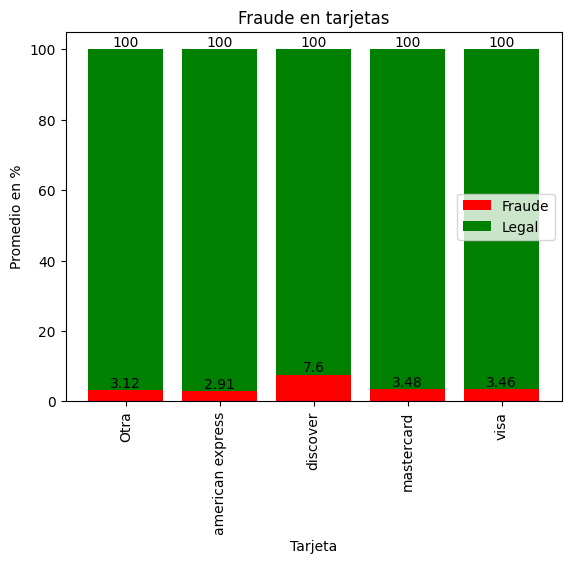

In [13]:
barplot(analisis_cantidad.Tarjeta, (analisis_cantidad["Promedio fraude en %"], analisis_cantidad["Promedio legal en %"]), "Fraude en tarjetas", "Tarjeta", "Promedio en %", True)

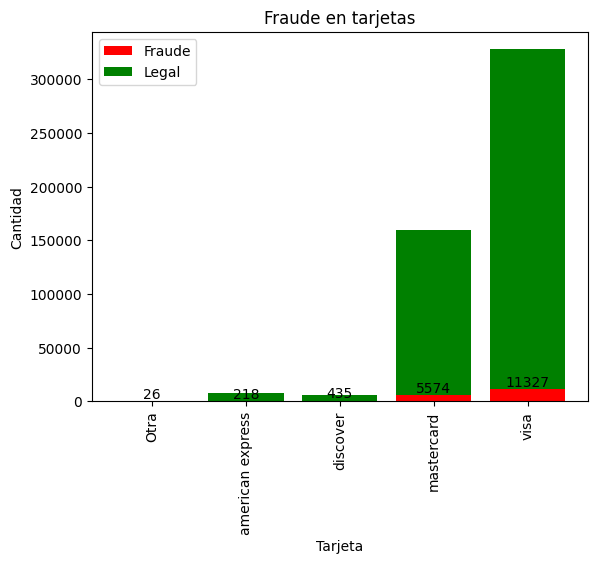

In [14]:
barplot(analisis_cantidad.Tarjeta, (analisis_cantidad["Fraude"], analisis_cantidad["Legal"]), "Fraude en tarjetas", "Tarjeta", "Cantidad", False)

In [15]:
#                   ANALISIS    POR     MONTO

In [16]:
analisis_monto = analisis.pivot_table(values="Monto", index="Tarjeta", columns="Transaccion", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_9664\1648781309.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis_monto = analisis.pivot_table(values="Monto", index="Tarjeta", columns="Transaccion", aggfunc=sum)


In [17]:
analisis_monto["Promedio fraude en %"] = round(analisis_monto.Fraude * 100 / (analisis_monto.Fraude + analisis_monto.Legal), 2)

In [18]:
analisis_monto["Promedio legal en %"] = round(analisis_monto.Legal * 100 / (analisis_monto.Fraude + analisis_monto.Legal), 2)

In [19]:
analisis_monto = analisis_monto.reset_index()

In [20]:
analisis_monto

Transaccion,Tarjeta,Fraude,Legal,Promedio fraude en %,Promedio legal en %
0,Otra,4563.040,1.542174e+05,2.87,97.13
1,american express,37618.184,1.277980e+06,2.86,97.14
2,discover,151767.470,1.322627e+06,10.29,89.71
3,mastercard,735542.712,2.037503e+07,3.48,96.52
4,visa,1684744.933,4.184610e+07,3.87,96.13


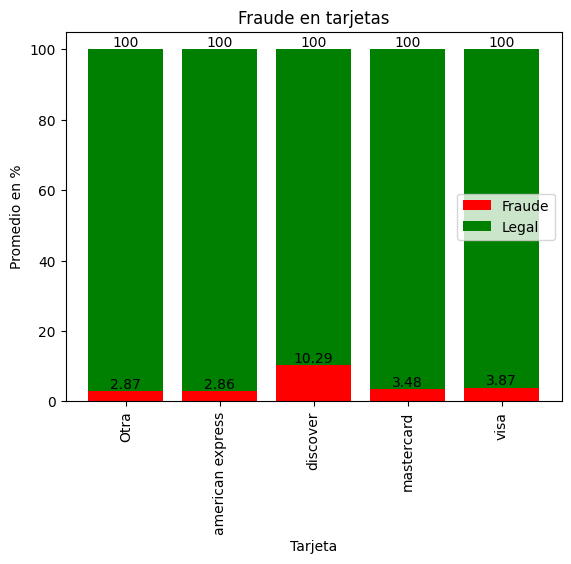

In [21]:
barplot(analisis_monto.Tarjeta, (analisis_monto["Promedio fraude en %"], analisis_monto["Promedio legal en %"]), "Fraude en tarjetas", "Tarjeta", "Promedio en %", True)

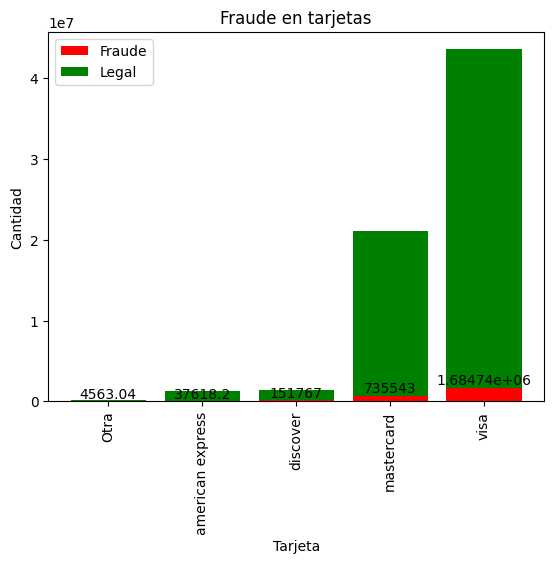

In [22]:
barplot(analisis_monto.Tarjeta, (analisis_monto["Fraude"], analisis_monto["Legal"]), "Fraude en tarjetas", "Tarjeta", "Cantidad", False)

In [23]:
#                   ANALISIS    DE      MANEJO      DE      DATO    NAN

In [25]:
#   Noveno analisis
analisis = transactions

In [26]:
analisis["product_category"] = analisis["product_category"].fillna("Otro")

In [27]:
analisis["feat_card_4"] = analisis["feat_card_4"].fillna("Otra")

In [28]:
analisis["feat_card_6"] = analisis["feat_card_6"].fillna("Otra")

In [29]:
analisis["payer_email_domain"] = analisis["payer_email_domain"].fillna("Otro")

In [32]:
analisis["receiver_email_domain"] = analisis["receiver_email_domain"].fillna("Otro")

In [34]:
analisis = analisis.fillna(0)

In [35]:
analisis

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,...,D330,D331,D332,D333,D334,D335,D336,D337,D338,D339
0,0,2987000,0,86400,68.50,W,13926,0.0,150.0,discover,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501954,501954,3488954,0,13151575,29.00,W,7919,194.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501955,501955,3488955,0,13151580,312.95,W,7919,194.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501956,501956,3488956,0,13151717,774.00,W,7919,194.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501957,501957,3488957,0,13151720,226.00,W,7919,194.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
